## Unsupervised Learning: Clustering

Clustering is the problem of finding useful types within a dataset.

For example in survey data it might (or might not) happen that white suburban moms tend to correlate in their brand preferences.

This is a "discovery" of useful structure within the data that can be put to some productive purpose.

Many of the greatest scientific discoveries are discoveries of clusters within data:

    * The existence of different classes (kingdoms, genera, species, etc) of related creatures
    * That elementary particles naturally occur in types (baryons, leptons, etc)
    * The existence of feature types within the genome (genes, mRNA, micrRNA, long non-coding regions, etc.)
    * Classifications of stars/galaxies
    * Useful classifications of all kinds.

### Why look for clusters?


Clusters reveal patterns in the data that are inherently interesting.


Automatic labeling for supervised learning.
*Most data is not already labeled, and labeling data is an expensive and time consuming process.*

We can predict properties of a new datapoint by assigning it to a known cluster with understood properties.

Anomaly detection can function based on assigning datapoints to clusters.


### $k$-means Clustering

This is a simple and widely used clustering algorithm.

Discovered by Stuart Lloyd, Bell Labs, 1957.  

Proprietary until 1982 (though independently rediscovered in 1965).

It is "prototype based" meaning clusters are determined by similarity to a "prototypical" cluster member.

A downside of $k$-means clustering is that $k$ must be chosen by the user.

---

### The $k$-means algorithm

![kmeans](kmeansPML.png)

A more mathematical statement of the algorithm:

![img](kmc.png)


In [65]:
from sklearn.datasets import make_blobs

X, y = make_blobs(n_samples=150, 
                  n_features=2, 
                  centers=3, 
                  cluster_std=0.5, 
                  shuffle=True, 
                  random_state=0)
                  

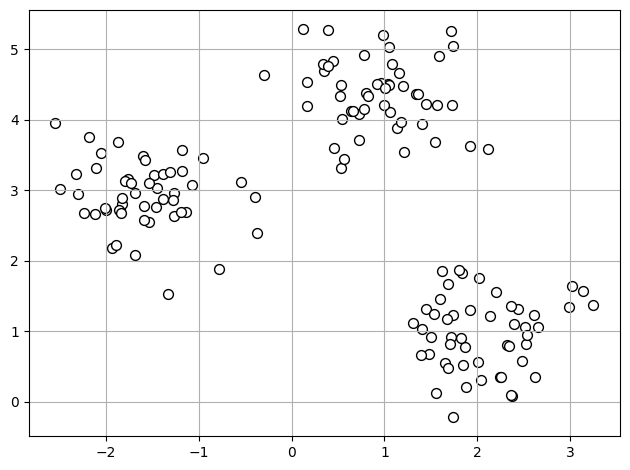

In [66]:
from hjkmeans import *
from hjplotKmeans import *

plotKmeans(X)

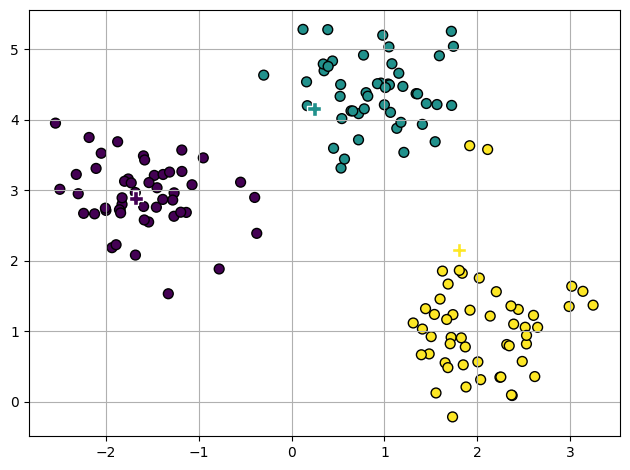

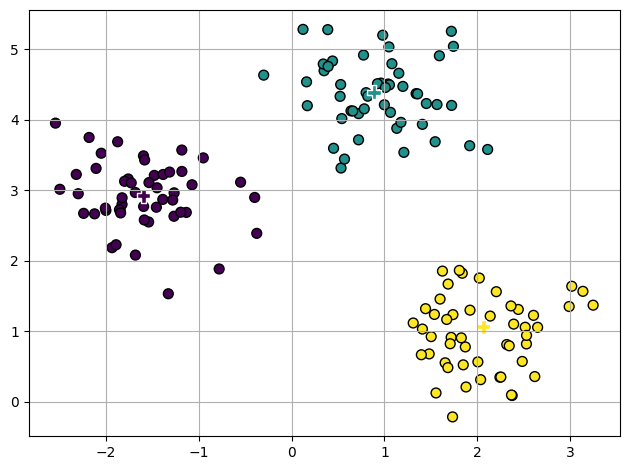

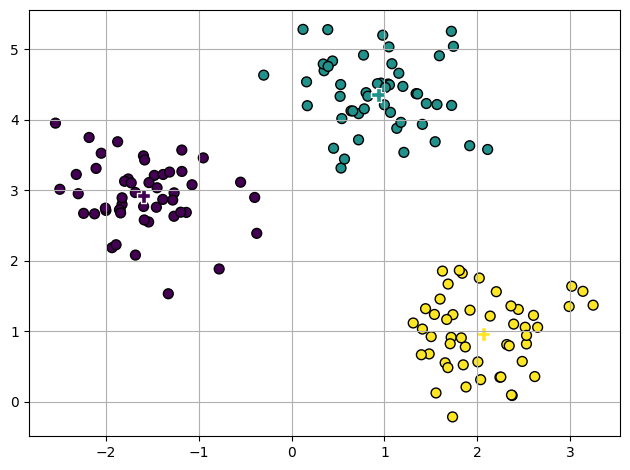

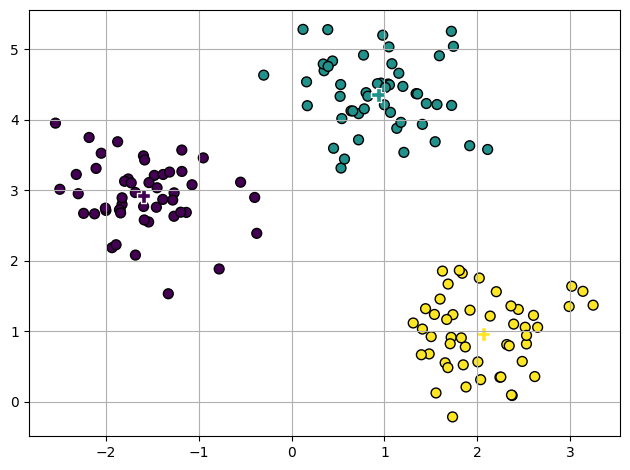

(array([[-1.5947298 ,  2.92236966],
        [ 0.9329651 ,  4.35420712],
        [ 2.06521743,  0.96137409]]),
 3)

In [67]:
kmeans(X,printOut=True)

In [69]:
k=3
means,tries=kmeans(X,k=k)
colors=np.array([((X-means[i])**2).sum(axis=1) for i in range(k)]).argmin(axis=0)
colors

array([1, 2, 2, 2, 1, 2, 2, 1, 0, 2, 1, 0, 0, 2, 2, 0, 0, 1, 0, 1, 2, 1,
       2, 2, 0, 1, 1, 2, 0, 1, 0, 0, 0, 0, 2, 1, 1, 1, 2, 2, 0, 0, 2, 1,
       1, 1, 0, 2, 0, 2, 1, 2, 2, 1, 1, 0, 2, 1, 0, 2, 0, 0, 0, 0, 2, 0,
       2, 1, 2, 2, 2, 1, 1, 2, 1, 2, 2, 0, 0, 2, 1, 1, 2, 2, 1, 1, 1, 0,
       0, 1, 1, 2, 1, 2, 1, 2, 0, 0, 1, 1, 1, 1, 0, 1, 1, 2, 0, 2, 2, 2,
       0, 2, 1, 0, 2, 0, 2, 2, 0, 0, 2, 1, 2, 2, 1, 1, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 2, 0, 1, 0, 2, 2, 1, 1, 0, 0, 0, 0, 1, 1])

In [51]:
from sklearn.cluster import KMeans
km = KMeans(n_clusters=3,
    init='random',
    n_init=10,
    max_iter=300,
    tol=1e-04)
y_km = km.fit_predict(X)
y_km

array([1, 0, 0, 0, 1, 0, 0, 1, 2, 0, 1, 2, 2, 0, 0, 2, 2, 1, 2, 1, 0, 1,
       0, 0, 2, 1, 1, 0, 2, 1, 2, 2, 2, 2, 0, 1, 1, 1, 0, 0, 2, 2, 0, 1,
       1, 1, 2, 0, 2, 0, 1, 0, 0, 1, 1, 2, 0, 1, 2, 0, 2, 2, 2, 2, 0, 2,
       0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 2, 2, 0, 1, 1, 0, 0, 1, 1, 1, 2,
       2, 1, 1, 0, 1, 0, 1, 0, 2, 2, 1, 1, 1, 1, 2, 1, 1, 0, 2, 0, 0, 0,
       2, 0, 1, 2, 0, 2, 0, 0, 2, 2, 0, 1, 0, 0, 1, 1, 2, 1, 2, 2, 2, 2,
       1, 2, 2, 2, 0, 2, 1, 2, 0, 0, 1, 1, 2, 2, 2, 2, 1, 1], dtype=int32)

In [52]:
km.inertia_

72.47601670996698

In [53]:
km = KMeans(n_clusters=3,
    init='k-means++',
    n_init=10,
    max_iter=300,
    tol=1e-04)
y_km = km.fit_predict(X)
y_km

array([1, 0, 0, 0, 1, 0, 0, 1, 2, 0, 1, 2, 2, 0, 0, 2, 2, 1, 2, 1, 0, 1,
       0, 0, 2, 1, 1, 0, 2, 1, 2, 2, 2, 2, 0, 1, 1, 1, 0, 0, 2, 2, 0, 1,
       1, 1, 2, 0, 2, 0, 1, 0, 0, 1, 1, 2, 0, 1, 2, 0, 2, 2, 2, 2, 0, 2,
       0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 2, 2, 0, 1, 1, 0, 0, 1, 1, 1, 2,
       2, 1, 1, 0, 1, 0, 1, 0, 2, 2, 1, 1, 1, 1, 2, 1, 1, 0, 2, 0, 0, 0,
       2, 0, 1, 2, 0, 2, 0, 0, 2, 2, 0, 1, 0, 0, 1, 1, 2, 1, 2, 2, 2, 2,
       1, 2, 2, 2, 0, 2, 1, 2, 0, 0, 1, 1, 2, 2, 2, 2, 1, 1], dtype=int32)

In [54]:
km.inertia_

72.47601670996698

In [55]:
KMeans?

Init signature:
KMeans(
    n_clusters=8,
    *,
    init='k-means++',
    n_init=10,
    max_iter=300,
    tol=0.0001,
    verbose=0,
    random_state=None,
    copy_x=True,
    algorithm='lloyd',
)
Docstring:     
K-Means clustering.

Read more in the :ref:`User Guide <k_means>`.

Parameters
----------

n_clusters : int, default=8
    The number of clusters to form as well as the number of
    centroids to generate.

init : {'k-means++', 'random'}, callable or array-like of shape             (n_clusters, n_features), default='k-means++'
    Method for initialization:

    'k-means++' : selects initial cluster centroids using sampling based on
    an empirical probability distribution of the points' contribution to the
    overall inertia. This technique speeds up convergence, and is
    theoretically proven to be :math:`\mathcal{O}(\log k)`-optimal.
    See the description of `n_init` for more details.

    'random': choose `n_clusters` observations (rows) at random from data
    for

## Choosing $k$ -- the elbow method

One way to choose $k$ is to try many values of $k$ and record the inertia for each fit.

As $k$ increases inertia will tend to 0. 

But often there is an "elbow" where increasing $k$ stops decreasing inertia at a high rate.

The "elbow method" uses this $k$ for $k$-means clustering.


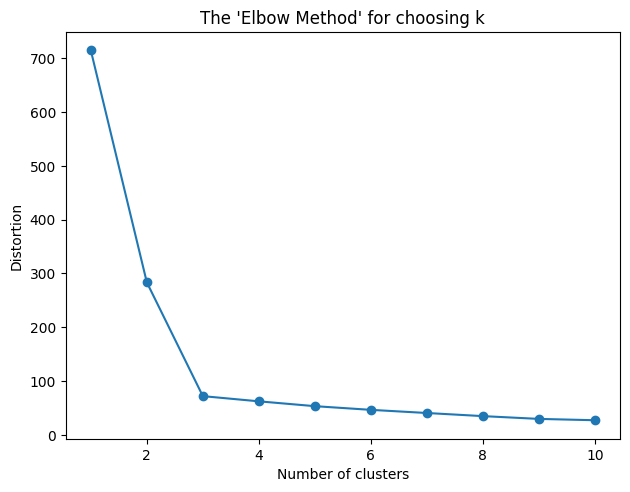

In [56]:
distortions = []
for i in range(1, 11):
    km = KMeans(n_clusters=i, 
                init='k-means++', 
                n_init=10, 
                max_iter=300, 
                random_state=0)
    km.fit(X)
    distortions.append(km.inertia_)
plt.plot(range(1, 11), distortions, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Distortion')
plt.tight_layout()
plt.title("The 'Elbow Method' for choosing k")
#plt.savefig('images/11_03.png', dpi=300)
plt.show()

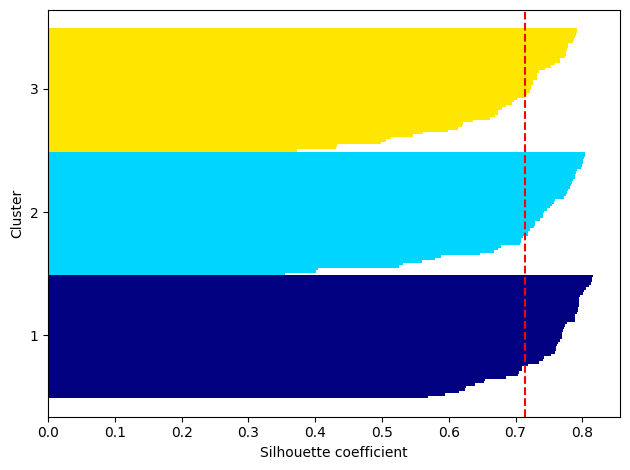

In [57]:
import numpy as np
from matplotlib import cm
from sklearn.metrics import silhouette_samples

km = KMeans(n_clusters=3, 
            init='k-means++', 
            n_init=10, 
            max_iter=300,
            tol=1e-04,
            random_state=0)
y_km = km.fit_predict(X)

cluster_labels = np.unique(y_km)
n_clusters = cluster_labels.shape[0]
silhouette_vals = silhouette_samples(X, y_km, metric='euclidean')
y_ax_lower, y_ax_upper = 0, 0
yticks = []
for i, c in enumerate(cluster_labels):
    c_silhouette_vals = silhouette_vals[y_km == c]
    c_silhouette_vals.sort()
    y_ax_upper += len(c_silhouette_vals)
    color = cm.jet(float(i) / n_clusters)
    plt.barh(range(y_ax_lower, y_ax_upper), c_silhouette_vals, height=1.0, 
             edgecolor='none', color=color)

    yticks.append((y_ax_lower + y_ax_upper) / 2.)
    y_ax_lower += len(c_silhouette_vals)
    
silhouette_avg = np.mean(silhouette_vals)
plt.axvline(silhouette_avg, color="red", linestyle="--") 

plt.yticks(yticks, cluster_labels + 1)
plt.ylabel('Cluster')
plt.xlabel('Silhouette coefficient')

plt.tight_layout()
#plt.savefig('images/11_04.png', dpi=300)
plt.show()

In [58]:
import pandas as pd

df = pd.read_csv("AirQualityUCI.csv",delimiter=";")
df.drop(df.columns[-1],axis=1,inplace=True)
df['Date']= pd.to_datetime(df['Date'],dayfirst=True).dt.day_of_year
df["Time"] = df["Time"].str.replace('.00.00','').astype("int")
df.head()

/var/folders/ht/7rqyw9hs3fj63k5lvf08qhdh0000gn/T/ipykernel_7265/1217913676.py:6: FutureWarning: The default value of regex will change from True to False in a future version.
  df["Time"] = df["Time"].str.replace('.00.00','').astype("int")


,Date,Time,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH
0,70,18,2.6,1360,150,11.9,1046,166,1056,113,1692,1268,13.6,48.9,0.7578
1,70,19,2.0,1292,112,9.4,955,103,1174,92,1559,972,13.3,47.7,0.7255
2,70,20,2.2,1402,88,9.0,939,131,1140,114,1555,1074,11.9,54.0,0.7502
3,70,21,2.2,1376,80,9.2,948,172,1092,122,1584,1203,11.0,60.0,0.7867
4,70,22,1.6,1272,51,6.5,836,131,1205,116,1490,1110,11.2,59.6,0.7888


In [59]:
X=df.values

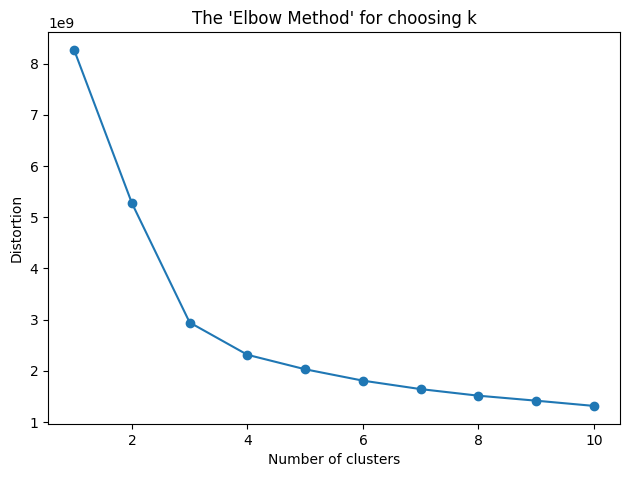

In [60]:
distortions = []
for i in range(1, 11):
    km = KMeans(n_clusters=i, 
                init='k-means++', 
                n_init=10, 
                max_iter=300, 
                random_state=0)
    km.fit(X)
    distortions.append(km.inertia_)
plt.plot(range(1, 11), distortions, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Distortion')
plt.tight_layout()
plt.title("The 'Elbow Method' for choosing k")
#plt.savefig('images/11_03.png', dpi=300)
plt.show()

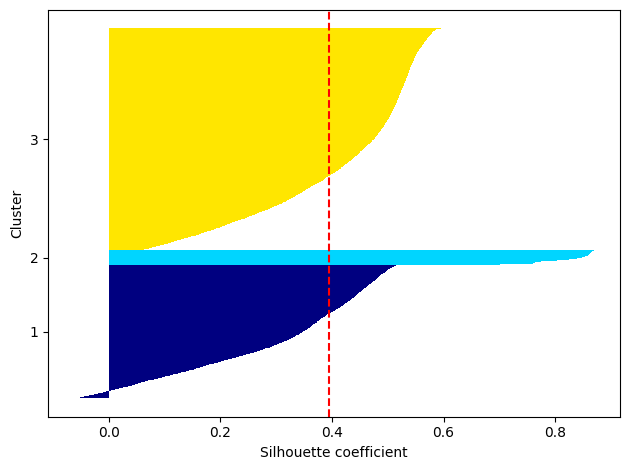

In [61]:
import numpy as np
from matplotlib import cm
from sklearn.metrics import silhouette_samples

km = KMeans(n_clusters=3, 
            init='k-means++', 
            n_init=10, 
            max_iter=300,
            tol=1e-04,
            random_state=0)
y_km = km.fit_predict(X)

cluster_labels = np.unique(y_km)
n_clusters = cluster_labels.shape[0]
silhouette_vals = silhouette_samples(X, y_km, metric='euclidean')
y_ax_lower, y_ax_upper = 0, 0
yticks = []
for i, c in enumerate(cluster_labels):
    c_silhouette_vals = silhouette_vals[y_km == c]
    c_silhouette_vals.sort()
    y_ax_upper += len(c_silhouette_vals)
    color = cm.jet(float(i) / n_clusters)
    plt.barh(range(y_ax_lower, y_ax_upper), c_silhouette_vals, height=1.0, 
             edgecolor='none', color=color)

    yticks.append((y_ax_lower + y_ax_upper) / 2.)
    y_ax_lower += len(c_silhouette_vals)
    
silhouette_avg = np.mean(silhouette_vals)
plt.axvline(silhouette_avg, color="red", linestyle="--") 

plt.yticks(yticks, cluster_labels + 1)
plt.ylabel('Cluster')
plt.xlabel('Silhouette coefficient')

plt.tight_layout()
#plt.savefig('images/11_04.png', dpi=300)
plt.show()

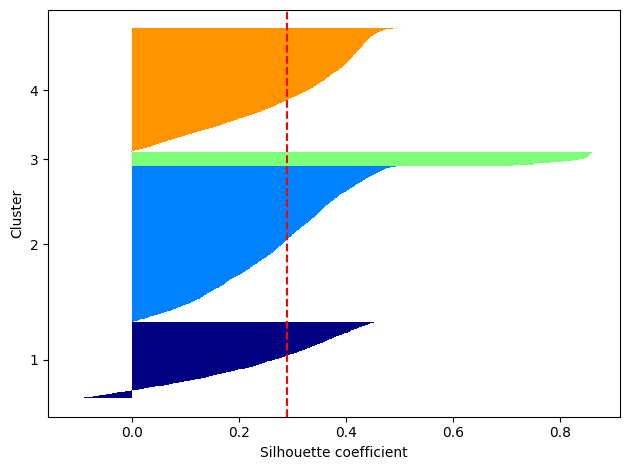

In [62]:
import numpy as np
from matplotlib import cm
from sklearn.metrics import silhouette_samples

km = KMeans(n_clusters=4, 
            init='k-means++', 
            n_init=10, 
            max_iter=300,
            tol=1e-04,
            random_state=0)
y_km = km.fit_predict(X)

cluster_labels = np.unique(y_km)
n_clusters = cluster_labels.shape[0]
silhouette_vals = silhouette_samples(X, y_km, metric='euclidean')
y_ax_lower, y_ax_upper = 0, 0
yticks = []
for i, c in enumerate(cluster_labels):
    c_silhouette_vals = silhouette_vals[y_km == c]
    c_silhouette_vals.sort()
    y_ax_upper += len(c_silhouette_vals)
    color = cm.jet(float(i) / n_clusters)
    plt.barh(range(y_ax_lower, y_ax_upper), c_silhouette_vals, height=1.0, 
             edgecolor='none', color=color)

    yticks.append((y_ax_lower + y_ax_upper) / 2.)
    y_ax_lower += len(c_silhouette_vals)
    
silhouette_avg = np.mean(silhouette_vals)
plt.axvline(silhouette_avg, color="red", linestyle="--") 

plt.yticks(yticks, cluster_labels + 1)
plt.ylabel('Cluster')
plt.xlabel('Silhouette coefficient')

plt.tight_layout()
#plt.savefig('images/11_04.png', dpi=300)
plt.show()

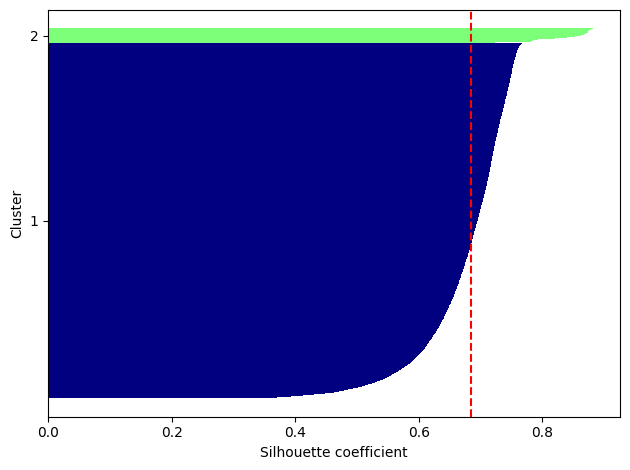

In [63]:
import numpy as np
from matplotlib import cm
from sklearn.metrics import silhouette_samples

km = KMeans(n_clusters=2, 
            init='k-means++', 
            n_init=10, 
            max_iter=300,
            tol=1e-04,
            random_state=0)
y_km = km.fit_predict(X)

cluster_labels = np.unique(y_km)
n_clusters = cluster_labels.shape[0]
silhouette_vals = silhouette_samples(X, y_km, metric='euclidean')
y_ax_lower, y_ax_upper = 0, 0
yticks = []
for i, c in enumerate(cluster_labels):
    c_silhouette_vals = silhouette_vals[y_km == c]
    c_silhouette_vals.sort()
    y_ax_upper += len(c_silhouette_vals)
    color = cm.jet(float(i) / n_clusters)
    plt.barh(range(y_ax_lower, y_ax_upper), c_silhouette_vals, height=1.0, 
             edgecolor='none', color=color)

    yticks.append((y_ax_lower + y_ax_upper) / 2.)
    y_ax_lower += len(c_silhouette_vals)
    
silhouette_avg = np.mean(silhouette_vals)
plt.axvline(silhouette_avg, color="red", linestyle="--") 

plt.yticks(yticks, cluster_labels + 1)
plt.ylabel('Cluster')
plt.xlabel('Silhouette coefficient')

plt.tight_layout()
#plt.savefig('images/11_04.png', dpi=300)
plt.show()